#  Generating Waveforms with TaylorFlow

Import tensorflow, taylorflow and other packages, eager execution is enable in order for tensorflow to behave similar to python,this is to become default in future versions of tensorflow

In [1]:
import tensorflow as tf
#enable Eager execution
tf.enable_eager_execution()

import taylorflow as tlf
import numpy as np
import matplotlib.pyplot as plt
import time

now generate a frequency domain waveform for m1 = m2 = 5 solar mass binary

In [2]:
mass1 = 5
mass2 = 5

freq, waveform = tlf.waveform.getwaveform(mass1,mass2,LuminosityDistance=1.,f_low=10.,
               df=1./512,f_high=300.,phase_order=7)

Instructions for updating:
Colocations handled automatically by placer.


now we can plot the waveform. The frequency and waveform are currently stored as tensors, these can be turned into numpy arrays with the .numpy() command. This should only be neccesary on the the frequency as it is stored as a variable.

C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\ops.py:739: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.array(self.numpy(), dtype=dtype)


Text(0,0.5,'Strain')

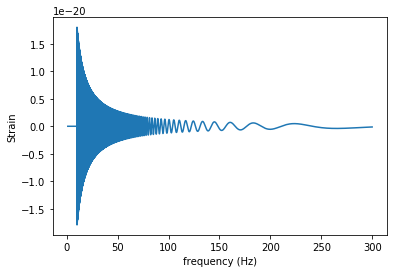

In [3]:
plt.plot(freq.numpy(),waveform)
plt.xlabel('frequency (Hz)')
plt.ylabel('Strain')

the device where the waveform calculations are performed can be controled using withdevice statements in TensorFlow

In [4]:
tfcpu_start = time.time()
with tf.device('/cpu:0'):
    freq, waveform = tlf.waveform.getwaveform(mass1,mass2,LuminosityDistance=1.,f_low=10.,
               df=1./512,f_high=300.,phase_order=7)
tfcpu_end = time.time()
tfcpu_speeds= tfcpu_end-tfcpu_start

print('CPU speed is %g' %tfcpu_speeds)

CPU speed is 0.0239842


The following code will not work without access to a GPU device, if one is not avaiable to you. It is reccomended that you run this tutorial in a colab notebook with GPU acceleration enabled

In [5]:
tfgpu_start = time.time()
with tf.device('/gpu:0'):
    freq, waveform = tlf.waveform.getwaveform(mass1,mass2,LuminosityDistance=1.,f_low=10.,
               df=1./512,f_high=300.,phase_order=7)
tfgpu_end = time.time()
tfgpu_speeds = tfgpu_end-tfgpu_start
print('GPU speed is %g' %tfgpu_speeds)

GPU speed is 0.0219743
